# Data Mining (KEN4113) #
## Lab 4: Clustering ##

Konstantin Sandfort
i6255681

In [170]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

## Assignment 1

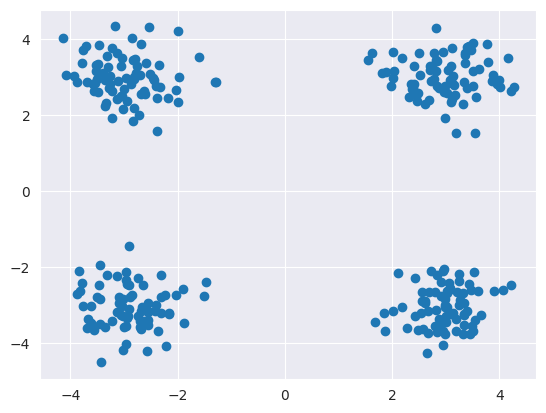

In [171]:
# (a) Data Generation

centers = [[-3, -3], [3, -3], [-3, 3], [3, 3]]
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.6, random_state=None)
plt.scatter(X[:, 0], X[:, 1])

In [172]:
def exec_KMeans(data_X, data_y, random_state_):
    fig, axs = plt.subplots(2, 5, figsize=(15, 8))
    y_kmeans_list = []
    scores = []

    for i in range(10):
        # Define k
        k = i+1
        # Fit model
        clusters = KMeans(n_clusters=k, random_state=random_state_, n_init="auto").fit(data_X)
        y_kmeans = clusters.predict(X)
        y_kmeans_list.append(y_kmeans)
        # Retrieve scores (SSE)
        scores.append(clusters.score(X))
        # Retrieve cluster centers
        cntr = clusters.cluster_centers_
        # Create subplots
        axs[int(i / 5), i % 5].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='magma')
        axs[int(i / 5), i % 5].scatter(cntr[:, 0], cntr[:, 1], c='black', s=80, alpha=0.8)
        axs[int(i / 5), i % 5].set_title(f'{k} K-Means')
    plt.show()
    
    # Plot scores
    # Create x labels for barplot
    x_labels = []
    for i in range(10):
        x_labels.append(str(i + 1))
    
    plt.figure()
    plt.bar(x_labels, np.abs(scores))
    plt.title('Sum of Square Errors for Different K-Means')
    plt.xlabel('K-Means')
    plt.ylabel('SSE')
    
    # Print contingency matrices
    for i in range(10):
        print(f'Contingency Matrix for k = {i+1}')
        print(contingency_matrix(data_y, y_kmeans_list[i]))
        print('---')

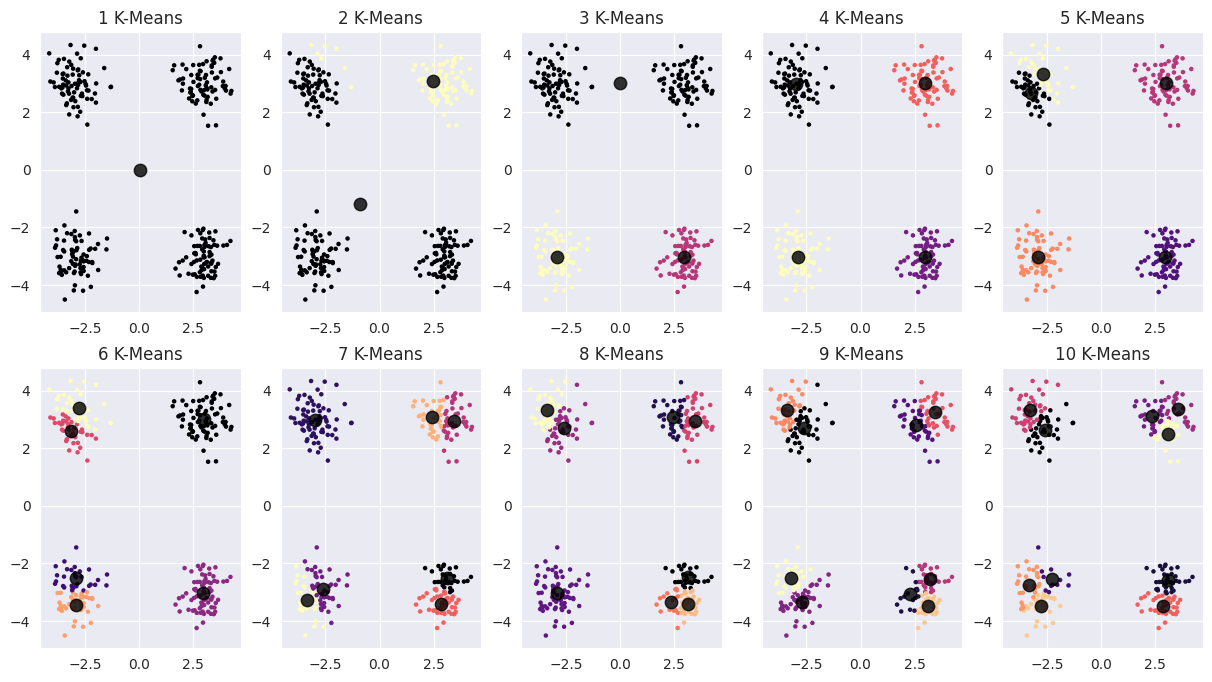

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[75  0]
 [75  0]
 [67  8]
 [ 0 75]]
---
Contingency Matrix for k = 3
[[ 0  0 75]
 [ 0 75  0]
 [75  0  0]
 [75  0  0]]
---
Contingency Matrix for k = 4
[[ 0  0  0 75]
 [ 0 75  0  0]
 [75  0  0  0]
 [ 0  0 75  0]]
---
Contingency Matrix for k = 5
[[ 0  0  0 75  0]
 [ 0 75  0  0  0]
 [40  0  0  0 35]
 [ 0  0 75  0  0]]
---
Contingency Matrix for k = 6
[[ 0 32  0  0 43  0]
 [ 0  0 75  0  0  0]
 [ 0  0  0 37  0 38]
 [75  0  0  0  0  0]]
---
Contingency Matrix for k = 7
[[ 0  0 45  0  0  0 30]
 [31  0  0  0 44  0  0]
 [ 0 75  0  0  0  0  0]
 [ 0  0  0 40  0 35  0]]
---
Contingency Matrix for k = 8
[[ 0  0 75  0  0  0  0  0]
 [29  0  0  0  0 16 30  0]
 [ 0  0  0 40  0  0  0 35]
 [ 0 35  0  0 40  0  0  0]]
---
Contingency Matrix for k = 9
[[ 0  0  0 48  0  0  0  0 27]
 [ 0 16  0  0 29  0  0 30  0]
 [40  0  0  0  0  0 35  0  0]
 [ 0  0 40  0  0 35  0  0  0]]
---
Contingency Matrix for k = 10
[[ 0  0 12  0  0

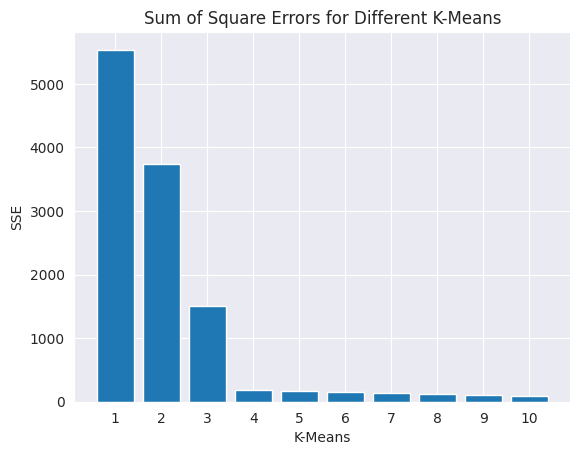

In [173]:
# (b), (c)
exec_KMeans(X, y, None)

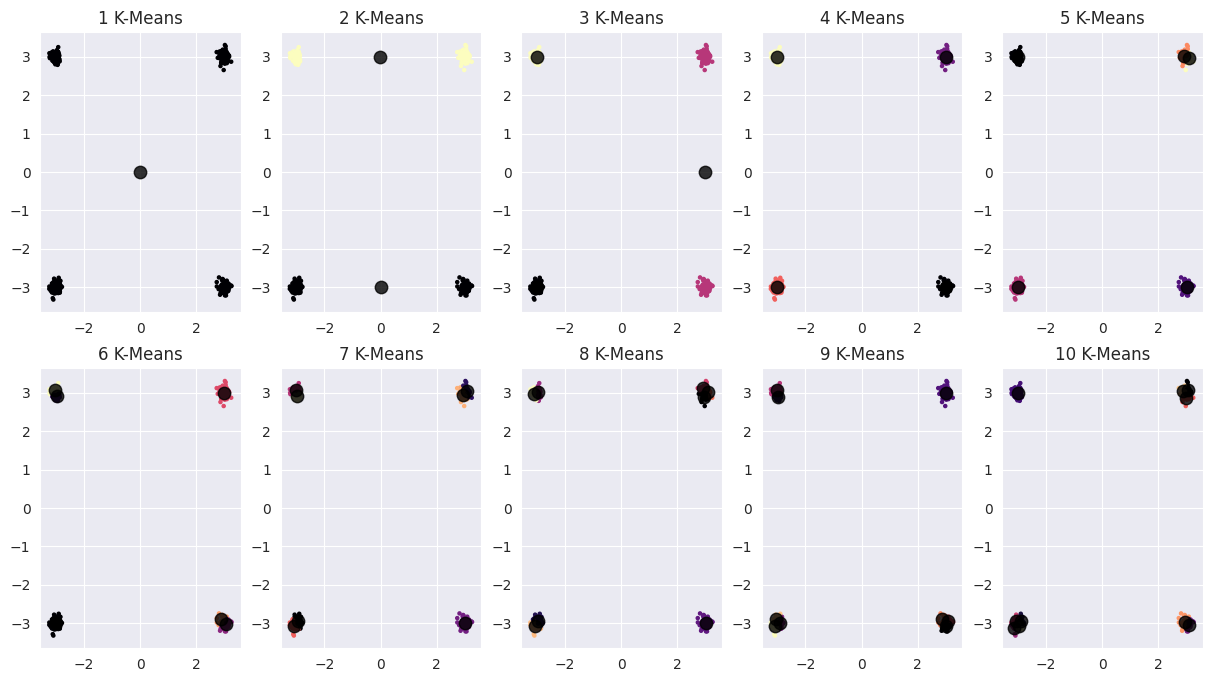

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[75  0]
 [75  0]
 [ 0 75]
 [ 0 75]]
---
Contingency Matrix for k = 3
[[75  0  0]
 [ 0 75  0]
 [ 0  0 75]
 [ 0 75  0]]
---
Contingency Matrix for k = 4
[[ 0  0 75  0]
 [75  0  0  0]
 [ 0  0  0 75]
 [ 0 75  0  0]]
---
Contingency Matrix for k = 5
[[ 0  0 75  0  0]
 [ 0 75  0  0  0]
 [75  0  0  0  0]
 [ 0  0  0 43 32]]
---
Contingency Matrix for k = 6
[[75  0  0  0  0  0]
 [ 0  0 57  0 18  0]
 [ 0 31  0  0  0 44]
 [ 0  0  0 75  0  0]]
---
Contingency Matrix for k = 7
[[41  0  0  0 34  0  0]
 [ 0  0 75  0  0  0  0]
 [ 0  0  0 44  0  0 31]
 [ 0 34  0  0  0 41  0]]
---
Contingency Matrix for k = 8
[[ 0 41  0  0  0  0 34  0]
 [ 0  0 75  0  0  0  0  0]
 [ 0  0  0 47  0  0  0 28]
 [28  0  0  0 20 27  0  0]]
---
Contingency Matrix for k = 9
[[ 0  0  0 30  0  0  0 17 28]
 [36  0  0  0  0 28 11  0  0]
 [ 0 32  0  0 43  0  0  0  0]
 [ 0  0 75  0  0  0  0  0  0]]
---
Contingency Matrix for k = 10
[[ 0 25  0  0 13

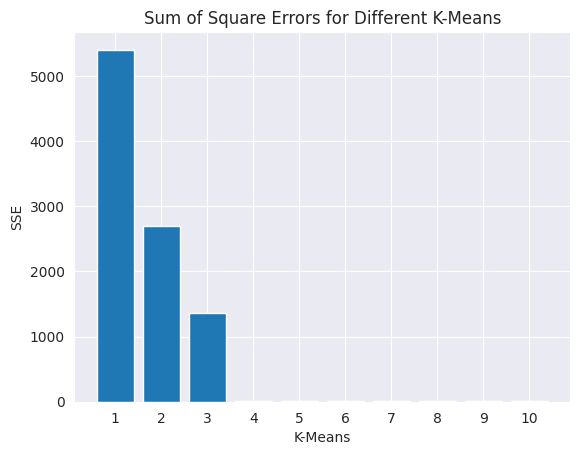

In [156]:
# (d) New Standard Deviation of 0.1
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.1, random_state=None)
exec_KMeans(X, y, None)

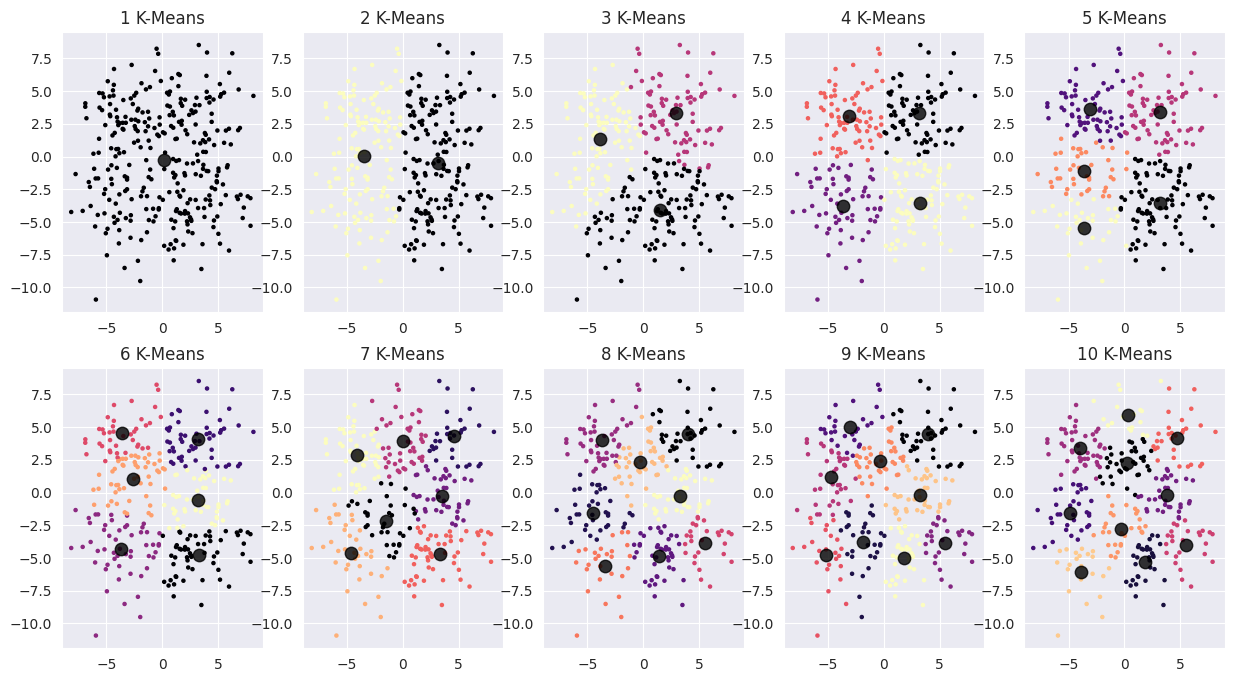

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[17 58]
 [70  5]
 [ 8 67]
 [68  7]]
---
Contingency Matrix for k = 3
[[43  1 31]
 [67  7  1]
 [ 1 12 62]
 [ 6 64  5]]
---
Contingency Matrix for k = 4
[[ 1 52  7 15]
 [ 4  7  0 64]
 [ 7  4 63  1]
 [60  0  7  8]]
---
Contingency Matrix for k = 5
[[14  3  0 29 29]
 [66  0  4  0  5]
 [ 1 54  7 13  0]
 [ 8  7 60  0  0]]
---
Contingency Matrix for k = 6
[[11  0 45  1 14  4]
 [44  1  7  0  0 23]
 [ 0  6  1 35 31  2]
 [ 1 47  0  3  6 18]]
---
Contingency Matrix for k = 7
[[23  0  1  1 10 35  5]
 [ 7  1 20  0 46  1  0]
 [ 4  0  2 21  0  2 46]
 [ 0 30 20 22  1  0  2]]
---
Contingency Matrix for k = 8
[[ 0 29 12  2  1 24  3  4]
 [ 1  0 30  0 26  3  1 14]
 [ 1  9  0 42  0  0 22  1]
 [37  0  1  3  0  0 15 19]]
---
Contingency Matrix for k = 9
[[ 0 23  0  1 12 23  3  4  9]
 [ 1  6  0 26  0  1  1 14 26]
 [ 1  2 25  0 25  0 21  1  0]
 [37  0  3  0  0  0 14 20  1]]
---
Contingency Matrix for k = 10
[[ 3  8 25  0  2

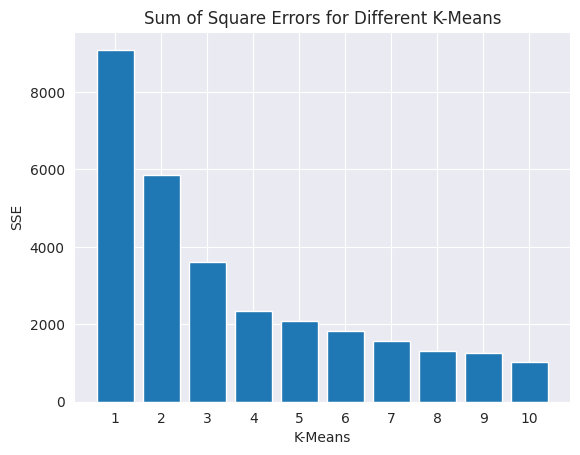

In [157]:
# (d) New Standard Deviation of 2.5
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=2.5, random_state=None)
exec_KMeans(X, y, None)

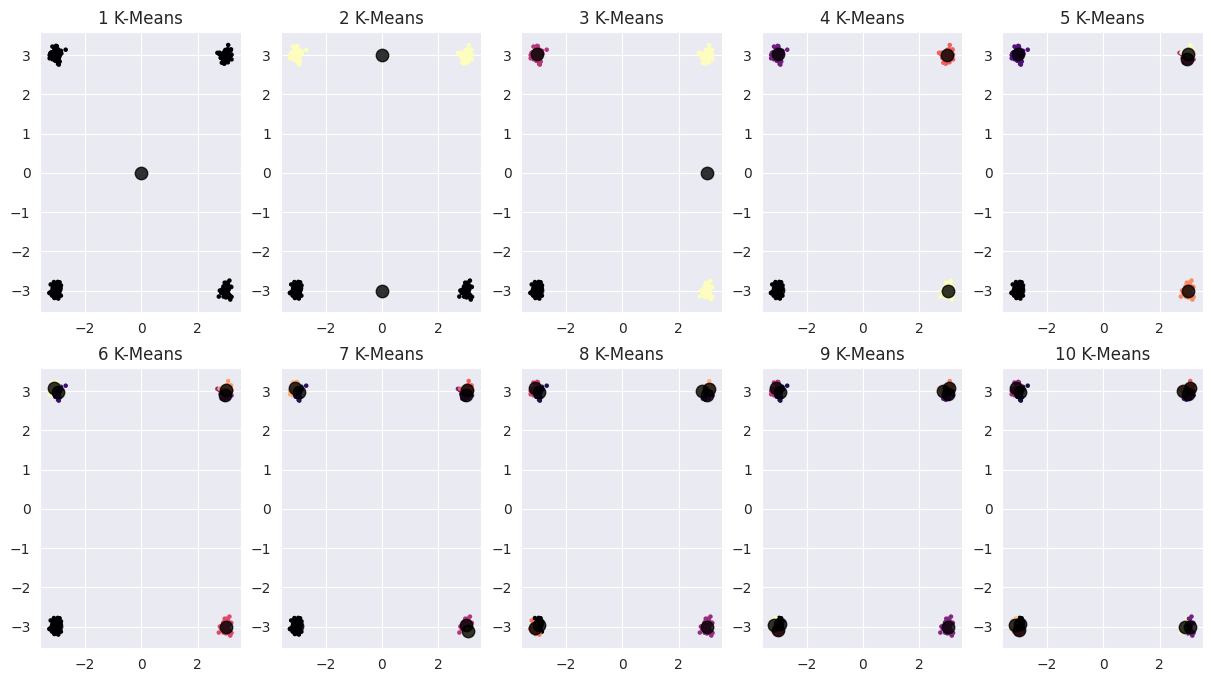

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[75  0]
 [75  0]
 [ 0 75]
 [ 0 75]]
---
Contingency Matrix for k = 3
[[75  0  0]
 [ 0  0 75]
 [ 0 75  0]
 [ 0  0 75]]
---
Contingency Matrix for k = 4
[[75  0  0  0]
 [ 0  0  0 75]
 [ 0 75  0  0]
 [ 0  0 75  0]]
---
Contingency Matrix for k = 5
[[75  0  0  0  0]
 [ 0  0  0 75  0]
 [ 0 75  0  0  0]
 [ 0  0 32  0 43]]
---
Contingency Matrix for k = 6
[[75  0  0  0  0  0]
 [ 0  0  0 75  0  0]
 [ 0 40  0  0  0 35]
 [ 0  0 32  0 43  0]]
---
Contingency Matrix for k = 7
[[75  0  0  0  0  0  0]
 [ 0  0  0 52  0  0 23]
 [ 0 40  0  0  0 35  0]
 [ 0  0 32  0 43  0  0]]
---
Contingency Matrix for k = 8
[[40  0  0  0  0 35  0  0]
 [ 0  0  0 75  0  0  0  0]
 [ 0 40  0  0 35  0  0  0]
 [ 0  0 31  0  0  0 31 13]]
---
Contingency Matrix for k = 9
[[31  0  0  0  0 27  0  0 17]
 [ 0  0  0 75  0  0  0  0  0]
 [ 0 40  0  0 35  0  0  0  0]
 [ 0  0 32  0  0  0 30 13  0]]
---
Contingency Matrix for k = 10
[[31  0  0  0  0

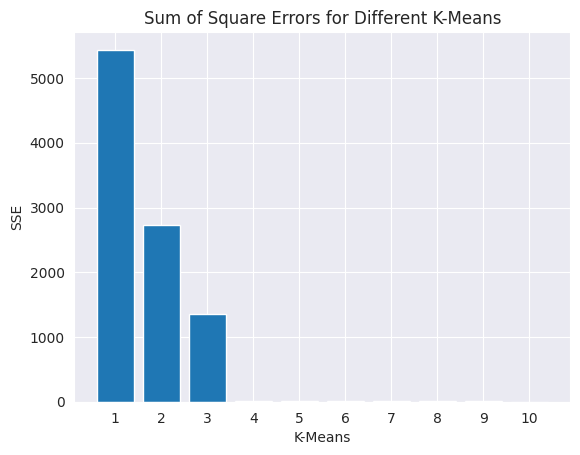

In [158]:
# (e) - Standard Deviation of 0.1
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.1, random_state=None)
exec_KMeans(X, y, 42)

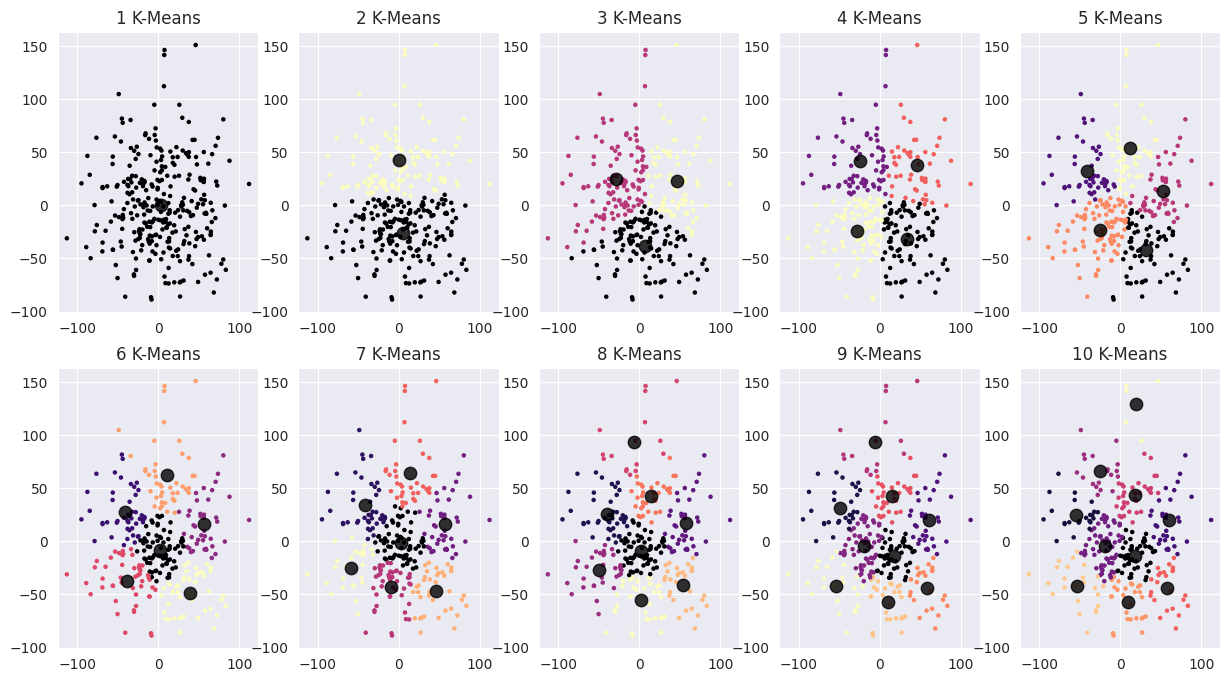

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[48 27]
 [49 26]
 [49 26]
 [38 37]]
---
Contingency Matrix for k = 3
[[31 28 16]
 [32 24 19]
 [30 33 12]
 [22 26 27]]
---
Contingency Matrix for k = 4
[[22 19 11 23]
 [26 14 14 21]
 [18 21  7 29]
 [20 19 19 17]]
---
Contingency Matrix for k = 5
[[16  9 10 25 15]
 [20 12 15 21  7]
 [13 14  9 28 11]
 [16 13 15 15 16]]
---
Contingency Matrix for k = 6
[[24  9  9 15  8 10]
 [16 13 13 11  7 15]
 [17 14  6 15 13 10]
 [15 12 14  8 15 11]]
---
Contingency Matrix for k = 7
[[23  9  9 10  8 10  6]
 [11 12 13 12  7 13  7]
 [18 13  6 12  9  8  9]
 [15 10 14 12 13  7  4]]
---
Contingency Matrix for k = 8
[[22  9  8  8  2 11  7  8]
 [15 11 13 10  3  5  9  9]
 [15 13  6 12  5  8  5 11]
 [13 12 13  4  6 10  8  9]]
---
Contingency Matrix for k = 9
[[12  7  7 17  2 11  6  5  8]
 [14  4 12 18  3  5  5  8  6]
 [10 11  5 14  5  8  5  8  9]
 [11  8 11 13  6 10  8  6  2]]
---
Contingency Matrix for k = 10
[[12  5  7 17  5

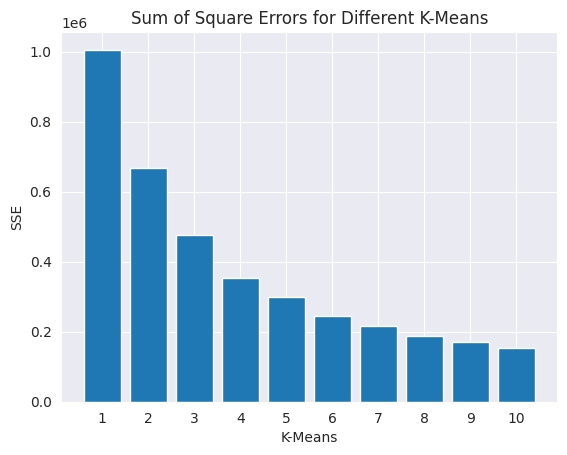

In [159]:
# (e) - Standard Deviation of 2.5
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=42, random_state=None)
exec_KMeans(X, y, 42)

## Assignment 2

In [94]:
# Load data
X = pd.read_csv('vertebrate.csv')
print(X.head(20))

# Remove non-numeric columns
y = X['Class']
X = X.drop(columns=['Name', 'Class'])
print(X.columns)

             Name  Warm-blooded  Gives Birth  Aquatic Creature  \
0           human             1            1                 0   
1          python             0            0                 0   
2          salmon             0            0                 1   
3           whale             1            1                 1   
4            frog             0            0                 1   
5          komodo             0            0                 0   
6             bat             1            1                 0   
7          pigeon             1            0                 0   
8             cat             1            1                 0   
9   leopard shark             0            1                 1   
10         turtle             0            0                 1   
11        penguin             1            0                 1   
12      porcupine             1            1                 0   
13            eel             0            0                 1   
14     sal

In [95]:
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
def hierarchical_clustering(link_type: str):
    Z = linkage(X, link_type)
    plt.figure(figsize=(10, 5))
    dn_ = dendrogram(Z)

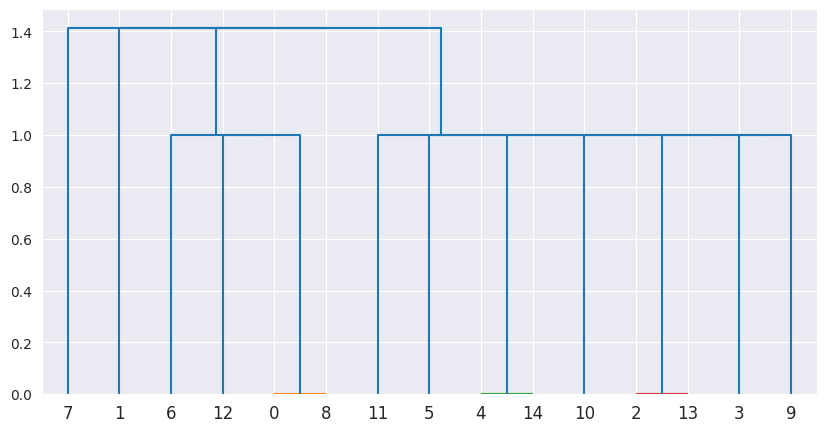

In [96]:
hierarchical_clustering('single')

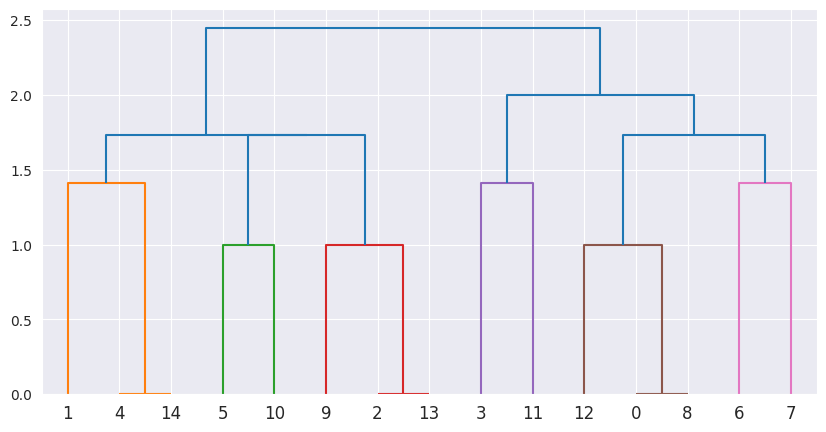

In [97]:
hierarchical_clustering('complete')

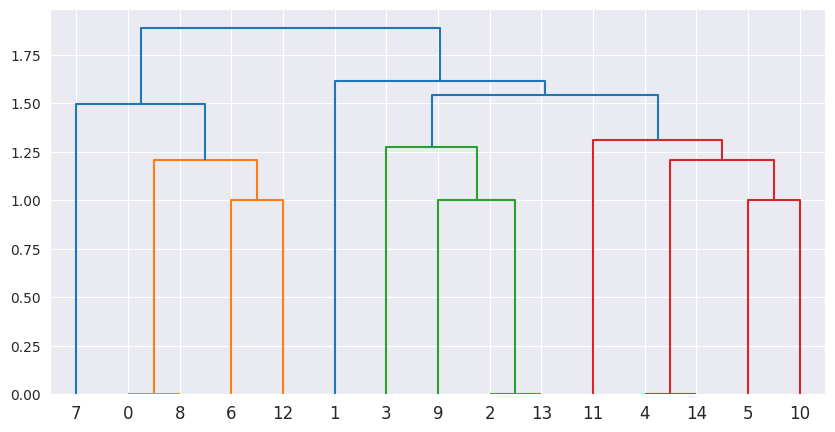

In [98]:
hierarchical_clustering('average')

## Assignment 3

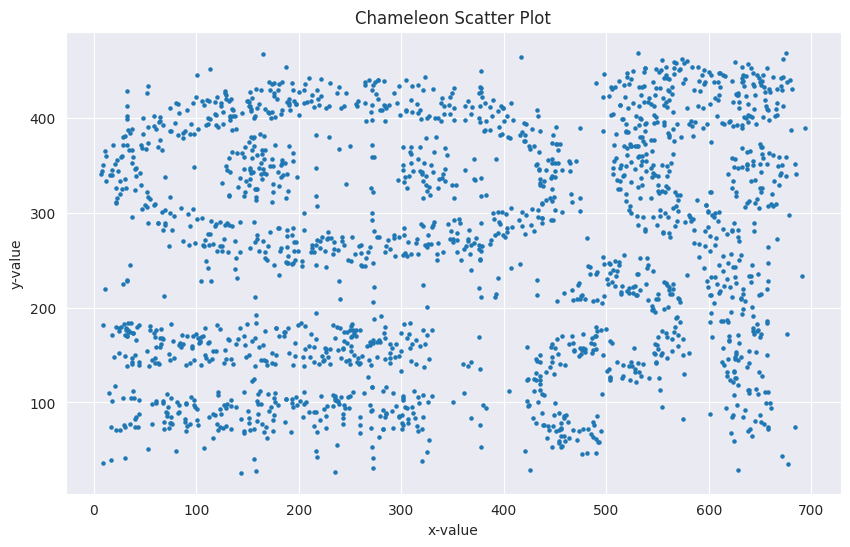

In [122]:
# Load data
X = pd.read_csv('chameleon.csv')
#print(X.iloc[:, 0])
plt.figure(figsize=(10, 6))
plt.title('Chameleon Scatter Plot')
plt.xlabel('x-value')
plt.ylabel('y-value')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=5)

In [132]:
# (c) - Experiment with different EPS values

def exec_DBSCAN(eps_value):
    db = DBSCAN(eps=eps_value, min_samples=5)
    db.fit(X)
    pred = db.fit_predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Scatter Plot (EPS = {eps_value})')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred, s=5, cmap='viridis')

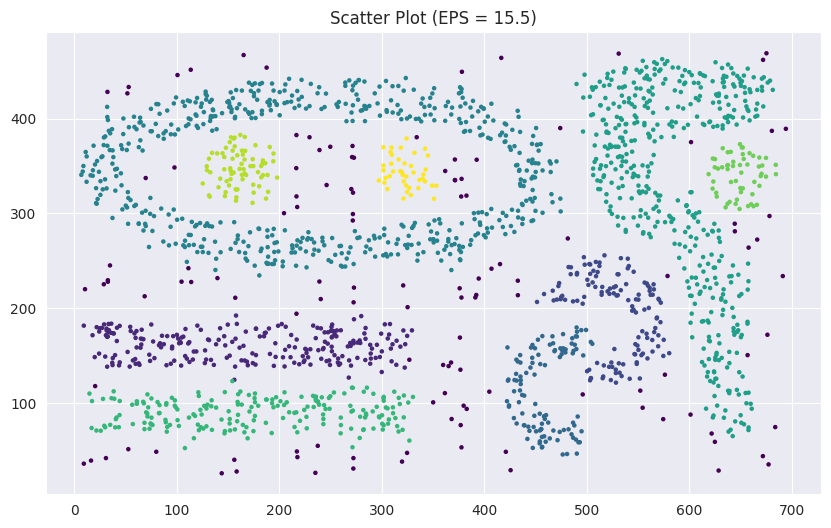

In [133]:
exec_DBSCAN(15.5)

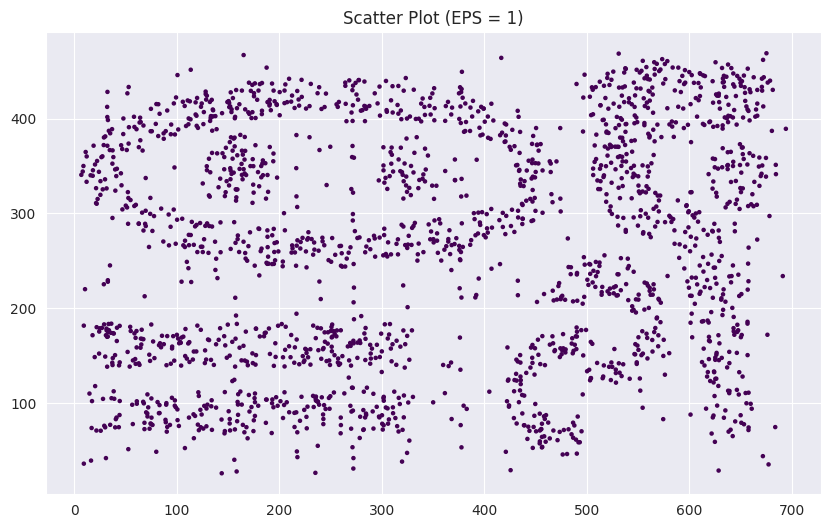

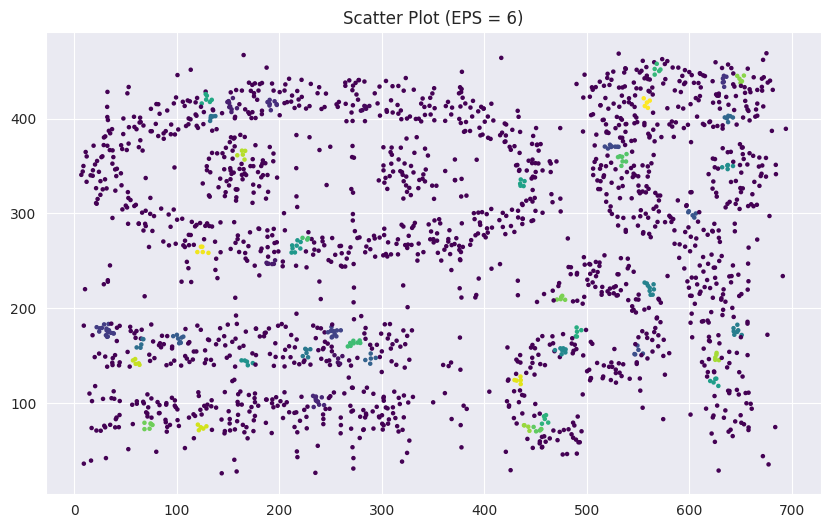

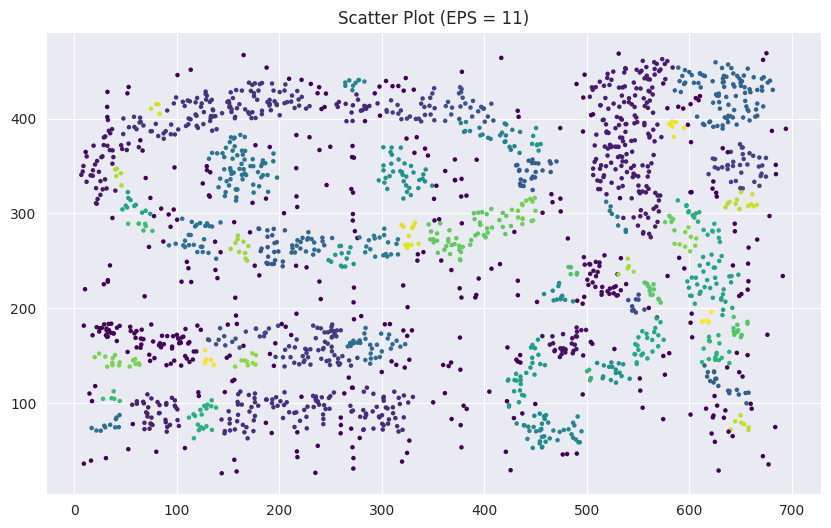

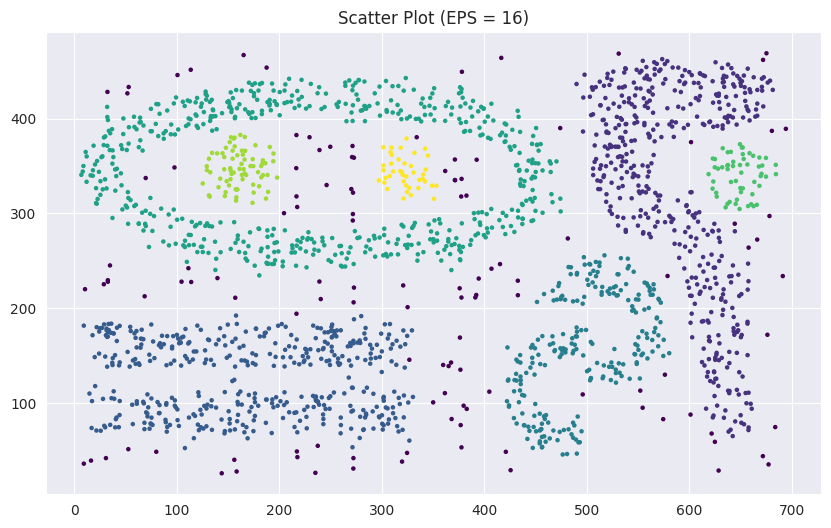

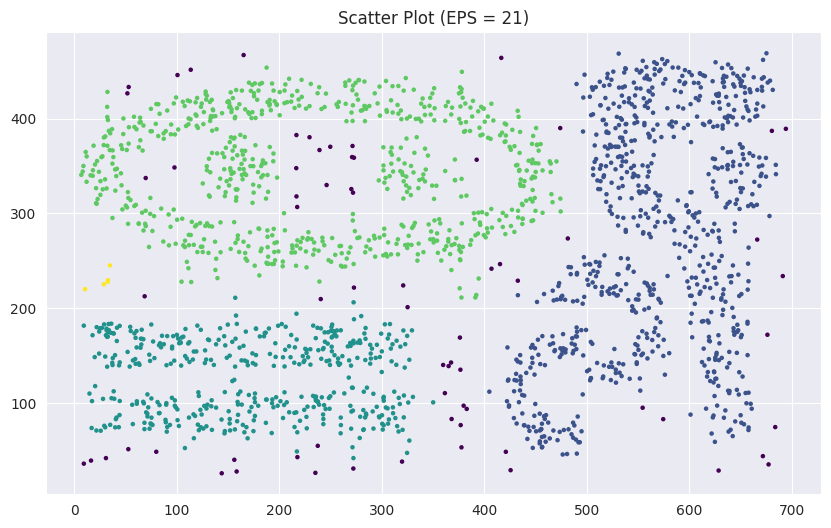

In [134]:
for i in [1, 6, 11, 16, 21]:
    exec_DBSCAN(i)